# Lab 4

## Load and Setup Data

In [66]:
import math
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.array_algos import replace
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

%matplotlib inline 

In [67]:
labeled_df = pd.read_csv('lab2_labeled.csv')

In [68]:
labeled_df.head()

,Unnamed: 0,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2_clusters,labels_3_clusters,labels_4_clusters
0,0,39.0,2062.0,588.0,1933.0,570.0,1.3801,97000.0,1,1,1
1,1,35.0,1852.0,358.0,1414.0,347.0,4.2750,173600.0,1,0,0
2,2,9.0,2486.0,626.0,1938.0,525.0,2.1293,151400.0,1,1,0
3,3,20.0,37.0,11.0,34.0,8.0,1.2000,50000.0,1,1,1
4,4,26.0,3535.0,748.0,1322.0,666.0,7.1674,500001.0,0,2,3


In [69]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          300 non-null    int64  
 1   housing_median_age  300 non-null    float64
 2   total_rooms         300 non-null    float64
 3   total_bedrooms      300 non-null    float64
 4   population          300 non-null    float64
 5   households          300 non-null    float64
 6   median_income       300 non-null    float64
 7   median_house_value  300 non-null    float64
 8   labels_2_clusters   300 non-null    int64  
 9   labels_3_clusters   300 non-null    int64  
 10  labels_4_clusters   300 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 25.9 KB


In [70]:
labeled_df.columns

Index(['Unnamed: 0', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value',
       'labels_2_clusters', 'labels_3_clusters', 'labels_4_clusters'],
      dtype='object')

In [71]:
labeled_df.drop(['Unnamed: 0','labels_2_clusters','labels_3_clusters'],axis=1, inplace=True)

In [72]:
labeled_df['labels_4_clusters'].value_counts()

labels_4_clusters
1    119
0    114
2     44
3     23
Name: count, dtype: int64

In [73]:
labeled_df.rename(columns={'labels_4_clusters': 'label'}, inplace=True)

In [74]:
labeled_df = labeled_df[labeled_df['label'] <= 2]

In [75]:
labeled_df['label'].value_counts()

label
1    119
0    114
2     44
Name: count, dtype: int64

In [76]:
labeled_df.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'label'],
      dtype='object')

In [77]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 299
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  277 non-null    float64
 1   total_rooms         277 non-null    float64
 2   total_bedrooms      277 non-null    float64
 3   population          277 non-null    float64
 4   households          277 non-null    float64
 5   median_income       277 non-null    float64
 6   median_house_value  277 non-null    float64
 7   label               277 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 19.5 KB


In [78]:
columns_to_scale = labeled_df.columns.to_list()
columns_to_scale.pop()

'label'

In [79]:
columns_to_scale

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [80]:
scaler = StandardScaler()

In [81]:
labeled_df_scaled = labeled_df.copy()
labeled_df_scaled[columns_to_scale] = scaler.fit_transform(labeled_df[columns_to_scale])

In [82]:
labeled_df_scaled.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,label
0,0.966780,-0.267877,0.035429,0.392802,0.096190,-1.530951,-0.976741,1
1,0.623779,-0.358658,-0.469192,-0.088990,-0.446137,0.600574,-0.016465,0
2,-1.605728,-0.084586,0.118801,0.397444,-0.013248,-0.979312,-0.294769,0
3,-0.662475,-1.143268,-1.230510,-1.370058,-1.270570,-1.663559,-1.565945,1
5,-0.319474,-0.064700,-0.036973,0.050256,-0.057024,-0.827192,-1.034408,1


## Logistic Regression Models

In [83]:
X_Train, X_Test, y_Train, y_Test = train_test_split(labeled_df_scaled.drop('label', axis=1), labeled_df_scaled['label'], test_size=0.2, random_state=42)

In [84]:
logmodel = LogisticRegression(multi_class='multinomial', random_state=42, solver='lbfgs')
logmodel.fit(X_Train, y_Train)

/Users/takosaga/anaconda3/envs/labs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42)

In [85]:
print('Logistic regression models coefficients of intercepts: ', logmodel.intercept_)

Logistic regression models coefficients of intercepts:  [ 1.951  0.315 -2.265]


In [86]:
print('Logistic regression models coefficients: ', logmodel.coef_)

Logistic regression models coefficients:  [[ 3.502e-03 -4.090e-01 -1.891e-01  2.513e-01  2.546e-01 -2.051e-02
   6.309e-01]
 [ 1.304e-01  2.933e-01  1.090e-01 -2.862e-01 -9.696e-02 -4.072e-01
  -4.651e+00]
 [-1.339e-01  1.157e-01  8.007e-02  3.488e-02 -1.577e-01  4.277e-01
   4.020e+00]]


In [87]:
predicts_test = logmodel.predict(X_Test)
confusion_matrix(y_Test, predicts_test)

array([[20,  0,  0],
       [ 0, 24,  0],
       [ 4,  0,  8]])

In [88]:
print(classification_report(y_Test, predicts_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      1.00      1.00        24
           2       1.00      0.67      0.80        12

    accuracy                           0.93        56
   macro avg       0.94      0.89      0.90        56
weighted avg       0.94      0.93      0.92        56



## Linear Discriminant Analysis

In [89]:
X_Train_array = np.array(X_Train.values)
X_Test_array = np.array(X_Test.values)
y_Train_array = np.array(y_Train.values)
y_Test_array = np.array(y_Test.values)

In [92]:
lda = LDA(n_components=2, solver='svd', store_covariance=True)

In [93]:
Xlda=lda.fit(X_Train_array, y_Train_array)

In [94]:
Xlda.classes_

array([0, 1, 2])

In [95]:
Xlda.n_features_in_

7

In [96]:
Xlda.explained_variance_ratio_

array([0.991, 0.009])

In [97]:
Xlda.n_components

2

In [98]:
Xlda.scalings_

array([[ 0.184,  0.125],
       [-0.19 , -2.777],
       [ 0.604,  0.328],
       [-0.311,  1.09 ],
       [-0.079,  1.351],
       [ 0.124,  0.615],
       [-2.669, -0.245]])

In [99]:
X_Train_array_t = lda.fit_transform(X_Train_array, y_Train_array)
X_Test_array_t = lda.transform(X_Test_array)

In [100]:
print(X_Train_array_t.shape, Xlda.scalings_.shape)

(221, 2) (7, 2)


In [101]:
X_Train_array_t

array([[-2.944e-01,  6.337e-01],
       [ 8.961e-01, -2.199e-01],
       [-1.134e-02,  1.939e+00],
       [-3.202e-01,  2.633e-01],
       [-1.403e+00,  2.590e-01],
       [ 2.367e+00,  6.606e-01],
       [ 4.334e+00, -6.678e-01],
       [ 2.965e+00, -4.466e-01],
       [ 2.145e+00,  1.737e+00],
       [ 1.767e+00,  5.525e-01],
       [-2.198e+00,  2.853e-02],
       [ 3.394e+00,  2.555e-01],
       [ 2.301e+00, -9.250e-01],
       [-3.602e-01, -1.586e-01],
       [ 3.616e+00, -1.101e+00],
       [ 2.604e+00, -7.181e-01],
       [ 2.463e-01,  4.836e-01],
       [-1.873e-01, -5.940e-01],
       [ 3.060e+00, -1.059e+00],
       [-1.093e+00, -6.071e-01],
       [ 2.392e+00,  2.657e-01],
       [-1.913e+00, -2.263e-01],
       [-4.891e+00, -7.026e-02],
       [-6.788e+00, -6.804e-01],
       [-2.067e+00,  4.476e-01],
       [ 2.364e+00,  5.040e-01],
       [ 1.703e+00, -1.365e-01],
       [ 3.557e+00, -2.254e-01],
       [ 2.118e+00, -9.663e-02],
       [ 2.654e+00, -6.582e-01],
       [ 1

/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_21155/3907750704.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', shadow=False, scatterpoints=1)


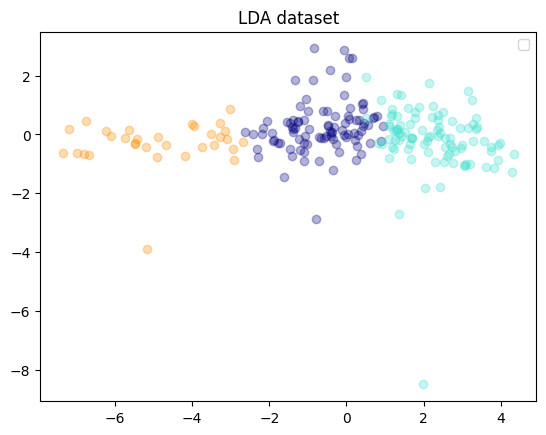

In [102]:
plt.figure()
colors = ['navy','turquoise','darkorange']
for color, i in zip(colors, [0,1,2]):
    plt.scatter(X_Train_array_t[y_Train_array==i,0], X_Train_array_t[y_Train_array==i,1],alpha=0.3, color=color)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA dataset')
plt.show()

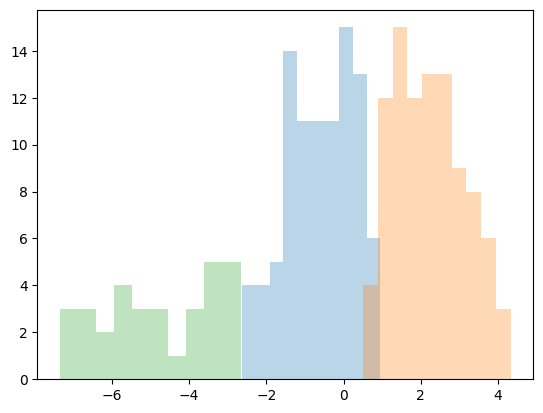

In [ ]:
n=len(np.unique(y_Train_array))
for i in range(0,n):
    plt.hist(X_Train_array_t[y_Train_array==i,0],10, alpha=0.3)

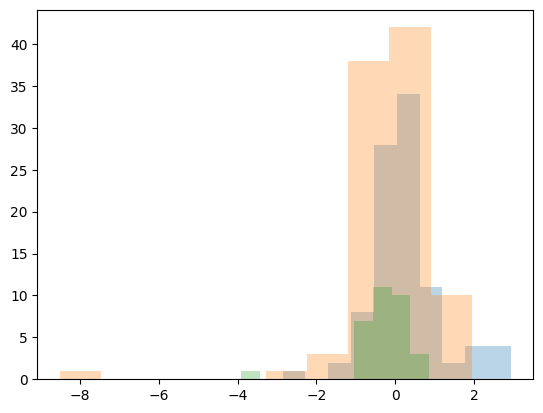

In [ ]:
n=len(np.unique(y_Train_array))
for i in range(0,n):
    plt.hist(X_Train_array_t[y_Train_array==i,1],10, alpha=0.3)

(array([ 4.,  4.,  5., 14., 11., 11., 11., 15., 13.,  6.]),
 array([-2.6326017 , -2.27386127, -1.91512083, -1.5563804 , -1.19763997,
        -0.83889954, -0.48015911, -0.12141867,  0.23732176,  0.59606219,
         0.95480262]),
 <BarContainer object of 10 artists>)

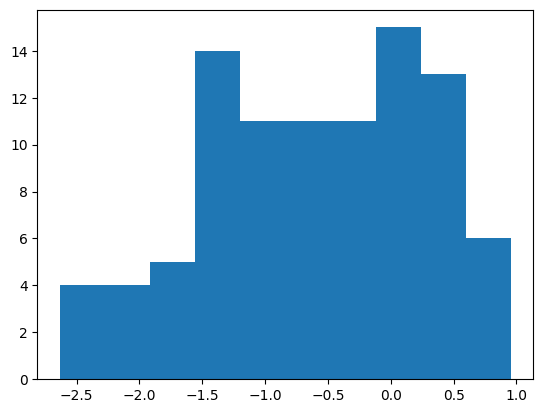

In [ ]:
plt.hist(X_Train_array_t[y_Train_array==0,0],10)

(array([ 4., 12., 15., 12., 13., 13.,  9.,  8.,  6.,  3.]),
 array([0.50263057, 0.88573351, 1.26883645, 1.65193938, 2.03504232,
        2.41814526, 2.8012482 , 3.18435114, 3.56745408, 3.95055702,
        4.33365996]),
 <BarContainer object of 10 artists>)

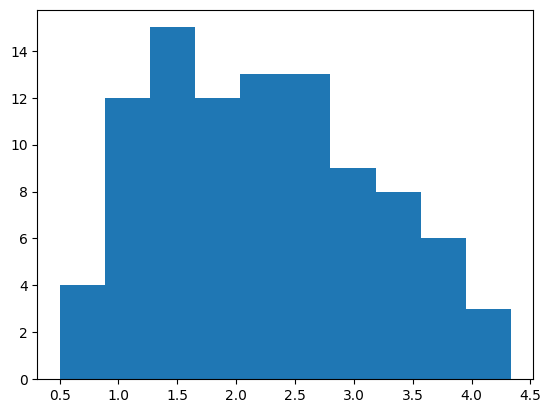

In [ ]:
plt.hist(X_Train_array_t[y_Train_array==1,0],10)

(array([3., 3., 2., 4., 3., 3., 1., 3., 5., 5.]),
 array([-7.3491812 , -6.88112833, -6.41307546, -5.94502259, -5.47696972,
        -5.00891685, -4.54086398, -4.07281111, -3.60475824, -3.13670537,
        -2.6686525 ]),
 <BarContainer object of 10 artists>)

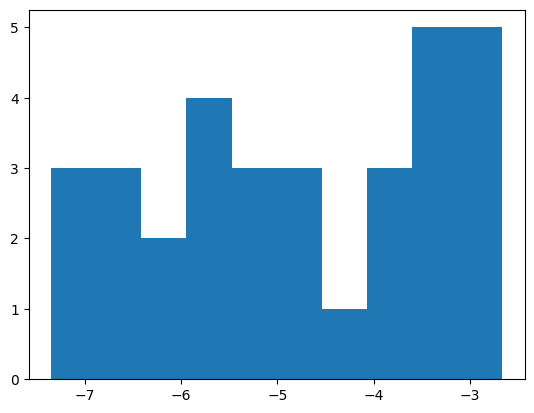

In [ ]:
plt.hist(X_Train_array_t[y_Train_array==2,0],10)

(array([ 1.,  0.,  2.,  8., 28., 34., 11.,  2.,  4.,  4.]),
 array([-2.85897969, -2.28071821, -1.70245673, -1.12419524, -0.54593376,
         0.03232773,  0.61058921,  1.18885069,  1.76711218,  2.34537366,
         2.92363515]),
 <BarContainer object of 10 artists>)

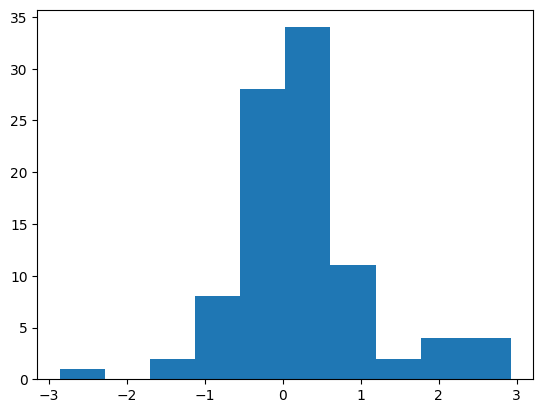

In [ ]:
plt.hist(X_Train_array_t[y_Train_array==0,1],10)

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  3., 38., 42., 10.]),
 array([-8.50138771, -7.45753789, -6.41368807, -5.36983825, -4.32598843,
        -3.28213861, -2.23828879, -1.19443897, -0.15058916,  0.89326066,
         1.93711048]),
 <BarContainer object of 10 artists>)

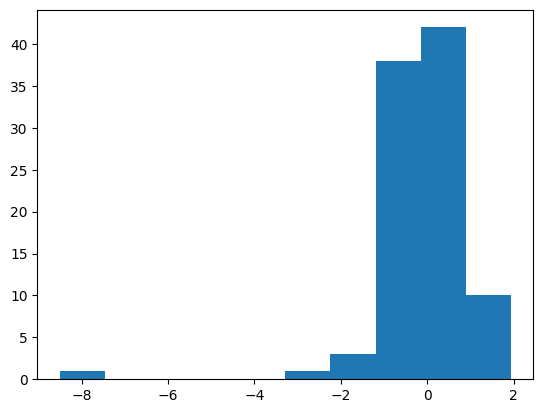

In [ ]:
plt.hist(X_Train_array_t[y_Train_array==1,1],10)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  7., 11., 10.,  3.]),
 array([-3.9065328 , -3.43028319, -2.95403359, -2.47778398, -2.00153438,
        -1.52528477, -1.04903517, -0.57278556, -0.09653596,  0.37971365,
         0.85596325]),
 <BarContainer object of 10 artists>)

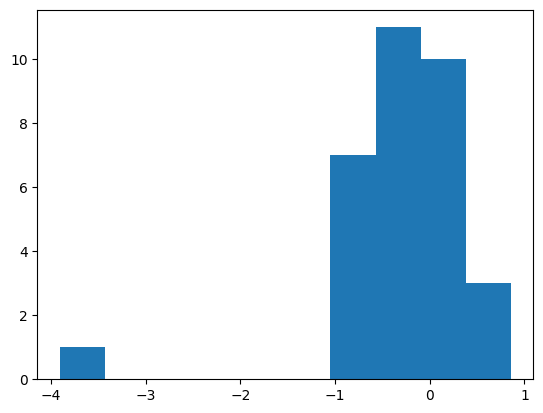

In [ ]:
plt.hist(X_Train_array_t[y_Train_array==2,1],10)

In [ ]:
lda.xbar_

array([ 0.00296261, -0.02215367, -0.03509696, -0.02256793, -0.03946078,
        0.00392301, -0.01470043])

In [ ]:
Xlda.xbar_

array([ 0.003, -0.022, -0.035, -0.023, -0.039,  0.004, -0.015])

In [ ]:
lda.means_

array([[ 0.03356175, -0.06355964, -0.05156106,  0.03506735, -0.01110109,
         0.15932069,  0.21817668],
       [-0.00264925, -0.0984826 , -0.06115349, -0.11280397, -0.12092018,
        -0.56791636, -0.86489158],
       [-0.0702622 ,  0.3260779 ,  0.09062162,  0.07601667,  0.11906523,
         1.24509045,  1.82522807]])

In [ ]:
Xlda.means_

array([[ 0.034, -0.064, -0.052,  0.035, -0.011,  0.159,  0.218],
       [-0.003, -0.098, -0.061, -0.113, -0.121, -0.568, -0.865],
       [-0.07 ,  0.326,  0.091,  0.076,  0.119,  1.245,  1.825]])

### Eigenvalues, Canonical correlation, Wiks stats and Chi-sq calculation

In [ ]:
np.set_printoptions(precision=3)

In [ ]:
cl_number = labeled_df_scaled['label'].nunique()
X=np.array(X_Train_array)
y=np.array(y_Train_array)
mean_vectors = []

for cl in range(0,cl_number):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print(f'Mean Vector class {cl}: {mean_vectors[cl]}')


Mean Vector class 0: [ 0.034 -0.064 -0.052  0.035 -0.011  0.159  0.218]
Mean Vector class 1: [-0.003 -0.098 -0.061 -0.113 -0.121 -0.568 -0.865]
Mean Vector class 2: [-0.07   0.326  0.091  0.076  0.119  1.245  1.825]


In [ ]:
n_columns = X.shape[1]

S_W=np.zeros((n_columns, n_columns))
row = np.zeros((1,n_columns))
for cl, mv in zip(range(0,cl_number), mean_vectors):
    class_sc_mat = np.zeros((n_columns, n_columns))
    mv = mv.reshape(n_columns, 1)
    for row in X[y==cl]:
        class_sc_mat += ((row-mv)).dot((row-mv).T)
    print(cl)
    print(class_sc_mat)
    S_W += class_sc_mat


0
[[520.444 521.22  521.124 520.432 520.801 519.439 518.969]
 [521.22  528.202 527.339 521.111 524.43  512.178 507.947]
 [521.124 527.339 526.571 521.027 523.982 513.075 509.309]
 [520.432 521.111 521.027 520.421 520.744 519.552 519.14 ]
 [520.801 524.43  523.982 520.744 522.47  516.1   513.9  ]
 [519.439 512.178 513.075 519.552 516.1   528.841 533.241]
 [518.969 507.947 509.309 519.14  513.9   533.241 539.921]]
1
[[608.155 591.674 598.094 589.211 587.815 510.943 459.87 ]
 [591.674 581.3   585.341 579.75  578.872 530.486 498.339]
 [598.094 585.341 590.309 583.435 582.355 522.873 483.355]
 [589.211 579.75  583.435 578.336 577.535 533.406 504.088]
 [587.815 578.872 582.355 577.535 576.778 535.061 507.346]
 [510.943 530.486 522.873 533.406 535.061 626.216 686.777]
 [459.87  498.339 483.355 504.088 507.346 686.777 805.987]]
2
[[436.965 384.919 415.838 417.756 412.103 264.236 188.054]
 [384.919 368.06  378.075 378.696 376.865 328.967 304.29 ]
 [415.838 378.075 400.509 401.901 397.799 290.51

In [ ]:
print(f'within-class Scatter Matrix: \n{S_W}')

within-class Scatter Matrix: 
[[1565.564 1497.812 1535.056 1527.399 1520.719 1294.618 1166.893]
 [1497.812 1477.562 1490.756 1479.558 1480.167 1371.631 1310.576]
 [1535.056 1490.756 1517.389 1506.364 1504.137 1326.461 1227.9  ]
 [1527.399 1479.558 1506.364 1502.098 1497.377 1341.085 1254.182]
 [1520.719 1480.167 1504.137 1497.377 1494.518 1346.319 1264.825]
 [1294.618 1371.631 1326.461 1341.085 1346.319 1634.119 1793.829]
 [1166.893 1310.576 1227.9   1254.182 1264.825 1793.829 2089.857]]


In [ ]:
overall_mean = np.mean(X, axis=0)
S_B = np.zeros((n_columns,n_columns))
for i,mean_vec in enumerate(mean_vectors):
    n = X[y==i,:].shape[0]
    mean_vec = mean_vec.reshape(n_columns,1)
    overall_mean = overall_mean.reshape(n_columns,1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec-overall_mean).T)
print(f'between-class Scatter Matrix:\n {S_B}')

between-class Scatter Matrix:
 [[ 2.626e-01 -8.944e-01 -3.280e-01 -1.712e-02 -2.465e-01 -2.156e+00
  -3.188e+00]
 [-8.944e-01  4.595e+00  1.654e+00  1.529e+00  2.247e+00  1.737e+01
   2.576e+01]
 [-3.280e-01  1.654e+00  5.957e-01  5.308e-01  7.955e-01  6.168e+00
   9.146e+00]
 [-1.712e-02  1.529e+00  5.308e-01  1.397e+00  1.352e+00  9.659e+00
   1.435e+01]
 [-2.465e-01  2.247e+00  7.955e-01  1.352e+00  1.510e+00  1.114e+01
   1.653e+01]
 [-2.156e+00  1.737e+01  6.168e+00  9.659e+00  1.114e+01  8.263e+01
   1.227e+02]
 [-3.188e+00  2.576e+01  9.146e+00  1.435e+01  1.653e+01  1.227e+02
   1.821e+02]]


In [ ]:
#Eigen values calculation
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(n_columns,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(7,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
ee=np.zeros((7,1))
k=0
print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])
    ee[k]+=i[0]
    k+=1

eig_df=pd.DataFrame(ee)
eig_df


Eigenvector 1: 
[[-0.268]
 [-0.008]
 [-0.178]
 [ 0.881]
 [-0.344]
 [-0.036]
 [-0.027]]
Eigenvalue 1: 1.44e-01

Eigenvector 2: 
[[-0.081]
 [ 0.086]
 [-0.737]
 [ 0.538]
 [ 0.161]
 [-0.217]
 [ 0.283]]
Eigenvalue 2: 1.65e-01

Eigenvector 3: 
[[-0.359]
 [ 0.184]
 [-0.685]
 [ 0.067]
 [ 0.323]
 [ 0.419]
 [-0.288]]
Eigenvalue 3: 1.82e-02

Eigenvector 4: 
[[ 0.793]
 [ 0.402]
 [-0.299]
 [-0.164]
 [ 0.136]
 [-0.094]
 [ 0.034]]
Eigenvalue 4: -2.24e-03

Eigenvector 5: 
[[ 0.793]
 [ 0.402]
 [-0.299]
 [-0.164]
 [ 0.136]
 [-0.094]
 [ 0.034]]
Eigenvalue 5: -2.24e-03

Eigenvector 6: 
[[ 0.689]
 [ 0.092]
 [ 0.581]
 [-0.1  ]
 [ 0.408]
 [-0.042]
 [-0.032]]
Eigenvalue 6: 7.71e-04

Eigenvector 7: 
[[ 0.277]
 [-0.125]
 [ 0.761]
 [ 0.168]
 [-0.526]
 [-0.125]
 [ 0.091]]
Eigenvalue 7: 7.74e-03
ok
Eigenvalues in decreasing order:

0.16452743596621647
0.14387589527139297
0.018229621054566717
0.007735128552097376
0.0022671032991573954
0.0022671032991573954
0.0007713980198282206


,0
0,0.164527
1,0.143876
2,0.018230
3,0.007735
4,0.002267
5,0.002267
6,0.000771


In [ ]:
# Canonical correlation calculation
aa=(eig_df.apply(lambda x:x/(x+1),axis=1))
can_cor = aa.apply(np.sqrt)
print(can_cor)

          0
0  0.375876
1  0.354654
2  0.133803
3  0.087611
4  0.047560
5  0.047560
6  0.027763


In [ ]:
L = eig_df.apply(lambda x: 1/(x+1),axis=1)
n=X.shape[0]
p=7
g=3
k=-(n-(p+g)/2-1)
LL=pd.DataFrame(np.zeros((7,2)), columns=['Lambda','Chi-sq'])
for j in range(0,len(L)):
  LL['Lambda'][j]=L[0][j]
  for i in range(j,len(L)-1):
    LL['Lambda'][j]=LL['Lambda'][j]*(L[0][i+1])
LL['Chi-sq']=L[0].apply(math.log)
LL['Chi-sq']=LL['Chi-sq']*k
print(LL)

     Lambda     Chi-sq
0  0.727742  32.747805
1  0.847475  28.900817
2  0.969407   3.884073
3  0.987079   1.656654
4  0.994714   0.486876
5  0.996969   0.486876
6  0.999229   0.165787


/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_21155/1493184364.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  LL['Lambda'][j]=L[0][j]
/var/folders/gp/6f7wmxfj5xn475t83fsklqcr0000gn/T/ipykernel_21155/1493184364.py:10: Future

In [104]:
print('LDA intercept: ', Xlda.intercept_)
print('coefficients: ', Xlda.coef_)
print('mean values of classes', Xlda.means_)


LDA intercept:  [ -1.052  -3.42  -13.358]
coefficients:  [[-8.237e-02 -5.853e-01 -2.906e-01  4.682e-01  3.907e-01  7.898e-02
   1.589e+00]
 [ 3.925e-01 -9.828e-03  1.298e+00 -8.555e-01 -3.769e-01  1.848e-01
  -5.915e+00]
 [-9.234e-01  1.748e+00 -2.999e+00  1.164e+00 -2.865e-02 -7.806e-01
   1.289e+01]]
mean values of classes [[ 0.034 -0.064 -0.052  0.035 -0.011  0.159  0.218]
 [-0.003 -0.098 -0.061 -0.113 -0.121 -0.568 -0.865]
 [-0.07   0.326  0.091  0.076  0.119  1.245  1.825]]


In [103]:
Xlda.means_

array([[ 0.034, -0.064, -0.052,  0.035, -0.011,  0.159,  0.218],
       [-0.003, -0.098, -0.061, -0.113, -0.121, -0.568, -0.865],
       [-0.07 ,  0.326,  0.091,  0.076,  0.119,  1.245,  1.825]])

In [ ]:
lda_predictions = lda.predict(X_Test_array)

In [ ]:
confusion_matrix(y_Test_array, lda_predictions)

array([[20,  0,  0],
       [ 1, 23,  0],
       [ 5,  0,  7]])

In [ ]:
Xlda.score(X_Test_array, y_Test_array)

0.8928571428571429

In [ ]:
print(classification_report(y_Test_array, lda_predictions))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        20
           1       1.00      0.96      0.98        24
           2       1.00      0.58      0.74        12

    accuracy                           0.89        56
   macro avg       0.92      0.85      0.86        56
weighted avg       0.92      0.89      0.89        56



## Logistic Model creation

In [ ]:
LogModel_lda = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', random_state=42)
LogModel_lda.fit(X_Train_array_t, y_Train_array)

/Users/takosaga/anaconda3/envs/labs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial', random_state=42)

In [ ]:
y_pred = LogModel_lda.predict(X_Test_array_t)

In [ ]:
confusion_matrix(y_Test_array, y_pred)

array([[20,  0,  0],
       [ 1, 23,  0],
       [ 1,  0, 11]])

In [ ]:
Xlda.score(X_Test_array, y_pred)

0.9285714285714286

In [ ]:
print(classification_report(y_Test_array,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.96      0.98        24
           2       1.00      0.92      0.96        12

    accuracy                           0.96        56
   macro avg       0.97      0.96      0.96        56
weighted avg       0.97      0.96      0.96        56

